In [ ]:
#probleme:
  ##est ce que on va donner a person x une credit ou pas ??????

In [ ]:
#import les packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
import pickle


In [ ]:
df =pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

In [ ]:
pd.set_option('display.max_rows',df.shape[0]+1)

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.000000,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.000000,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.000000,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.000000,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.000000,349.0,360.0,1.0,Semiurban,N


In [ ]:
#voir les valeurs manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [ ]:
#Renseigner les valeurs manquantes
cat_data=[]
num_data=[]
for i,c in enumerate(df.dtypes):
  if c==object:
    cat_data.append(df.iloc[:,i])
  else :
    num_data.append(df.iloc[:,i])


In [ ]:
cat_data=pd.DataFrame(cat_data).T
num_data=pd.DataFrame(num_data).T

In [ ]:
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,Semiurban,N


In [ ]:
#Pour les variables categorique on va remplacer les valeurs manquantes par les valeurs qui repete en plus
cat_data=cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any()

False

In [ ]:
#pour les variables nemerique on va remplacer manquente par la valeur precedante de la meme columns
num_data.fillna(method='bfill',inplace=True)
num_data.isnull().sum().any()

False

In [ ]:
#transformer :la columns target
target_value= {'Y':1,'N':0}
target=cat_data['Loan_Status']
cat_data.drop('Loan_Status',axis=1,inplace=True)
target=target.map(target_value)

In [ ]:
target

0      1
1      0
2      1
3      1
4      1
5      1
6      1
7      0
8      1
9      0
10     1
11     1
12     1
13     0
14     1
15     1
16     1
17     0
18     0
19     1
20     0
21     1
22     0
23     0
24     0
25     1
26     1
27     1
28     0
29     1
30     0
31     0
32     0
33     1
34     0
35     1
36     0
37     1
38     1
39     1
40     0
41     1
42     1
43     1
44     1
45     1
46     1
47     1
48     0
49     1
50     1
51     1
52     0
53     0
54     0
55     1
56     1
57     0
58     1
59     1
60     1
61     1
62     0
63     0
64     0
65     0
66     0
67     1
68     1
69     0
70     1
71     1
72     1
73     0
74     1
75     0
76     0
77     0
78     0
79     1
80     1
81     1
82     0
83     0
84     1
85     1
86     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     1
95     0
96     1
97     1
98     1
99     1
100    1
101    1
102    1
103    1
104    1
105    1
106    1
107    0
108    0
109    1
110    1
1

In [ ]:
#Remplacer les valeurs categorique par des valeurs numerique
le=LabelEncoder()
for i in cat_data:
  cat_data[i]=le.fit_transform(cat_data[i])
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2
5,5,1,1,2,0,1,2
6,6,1,1,0,1,0,2
7,7,1,1,3,0,0,1
8,8,1,1,2,0,0,2
9,9,1,1,1,0,0,1


In [ ]:
#supprimer loan_id
cat_data.drop('Loan_ID',axis=1,inplace=True)

In [ ]:
#concatener cat_data et num_data
x=pd.concat([cat_data,num_data],axis=1)
y=target


Understand the data EDA

In [ ]:
 #va commencer par le variable target
 target.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [ ]:
#base utilise pour EDA
df=pd.concat([cat_data,num_data,target],axis=1)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


le pourcentage des credit accordes est:0.3127035830618892 
le pourcentage des credit non accordes est:0.6872964169381107 


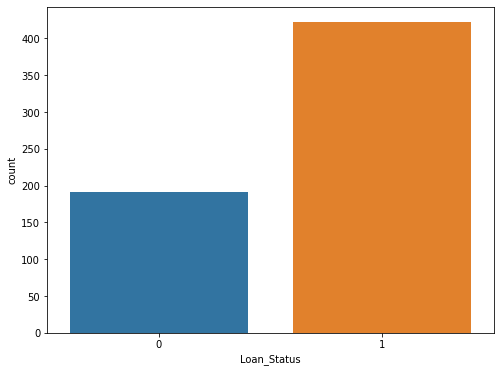

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(target)
yes=target.value_counts()[0]/len(target)
no=target.value_counts()[1]/len(target)
print(f'le pourcentage des credit accordes est:{yes} ')
print(f'le pourcentage des credit non accordes est:{no} ')

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


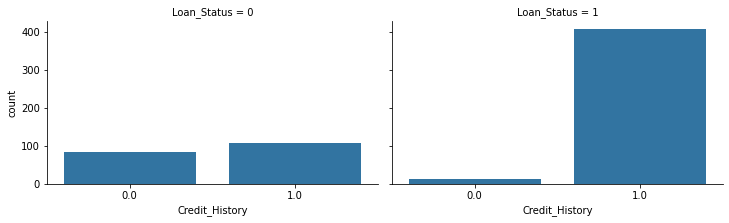

In [ ]:
#Credit history
grid=sns.FacetGrid(df,col='Loan_Status',size=3.2,aspect=1.6)
grid.map(sns.countplot,'Credit_History')

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


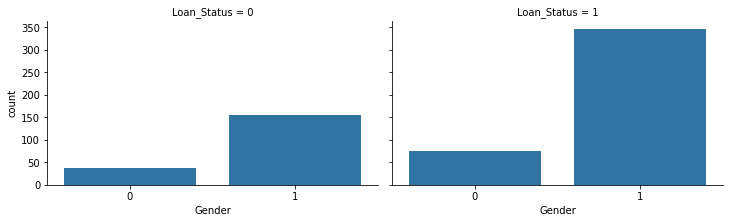

In [ ]:
#Sex
grid=sns.FacetGrid(df,col='Loan_Status',size=3.2,aspect=1.6)
grid.map(sns.countplot,'Gender')

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


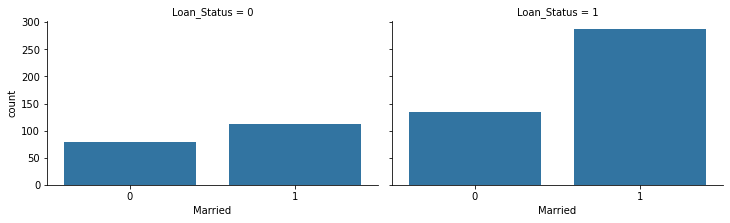

In [ ]:
#married
grid=sns.FacetGrid(df,col='Loan_Status',size=3.2,aspect=1.6)
grid.map(sns.countplot,'Married')

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


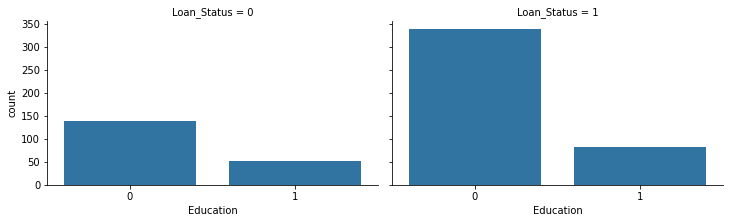

In [ ]:
#Education
grid=sns.FacetGrid(df,col='Loan_Status',size=3.2,aspect=1.6)
grid.map(sns.countplot,'Education')

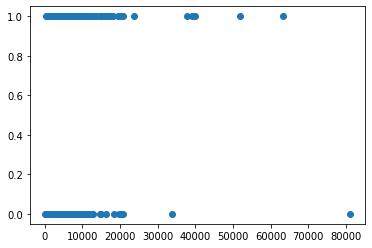

In [ ]:
#revenu du demandeur
plt.scatter(df['ApplicantIncome'],df['Loan_Status'])

In [ ]:
df.groupby('Loan_Status').median()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,,,,,,,
0,1.0,1.0,0.0,0.0,0.0,1.0,3833.5,268.0,132.5,360.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,3812.5,1239.5,127.5,360.0,1.0


##Correlation

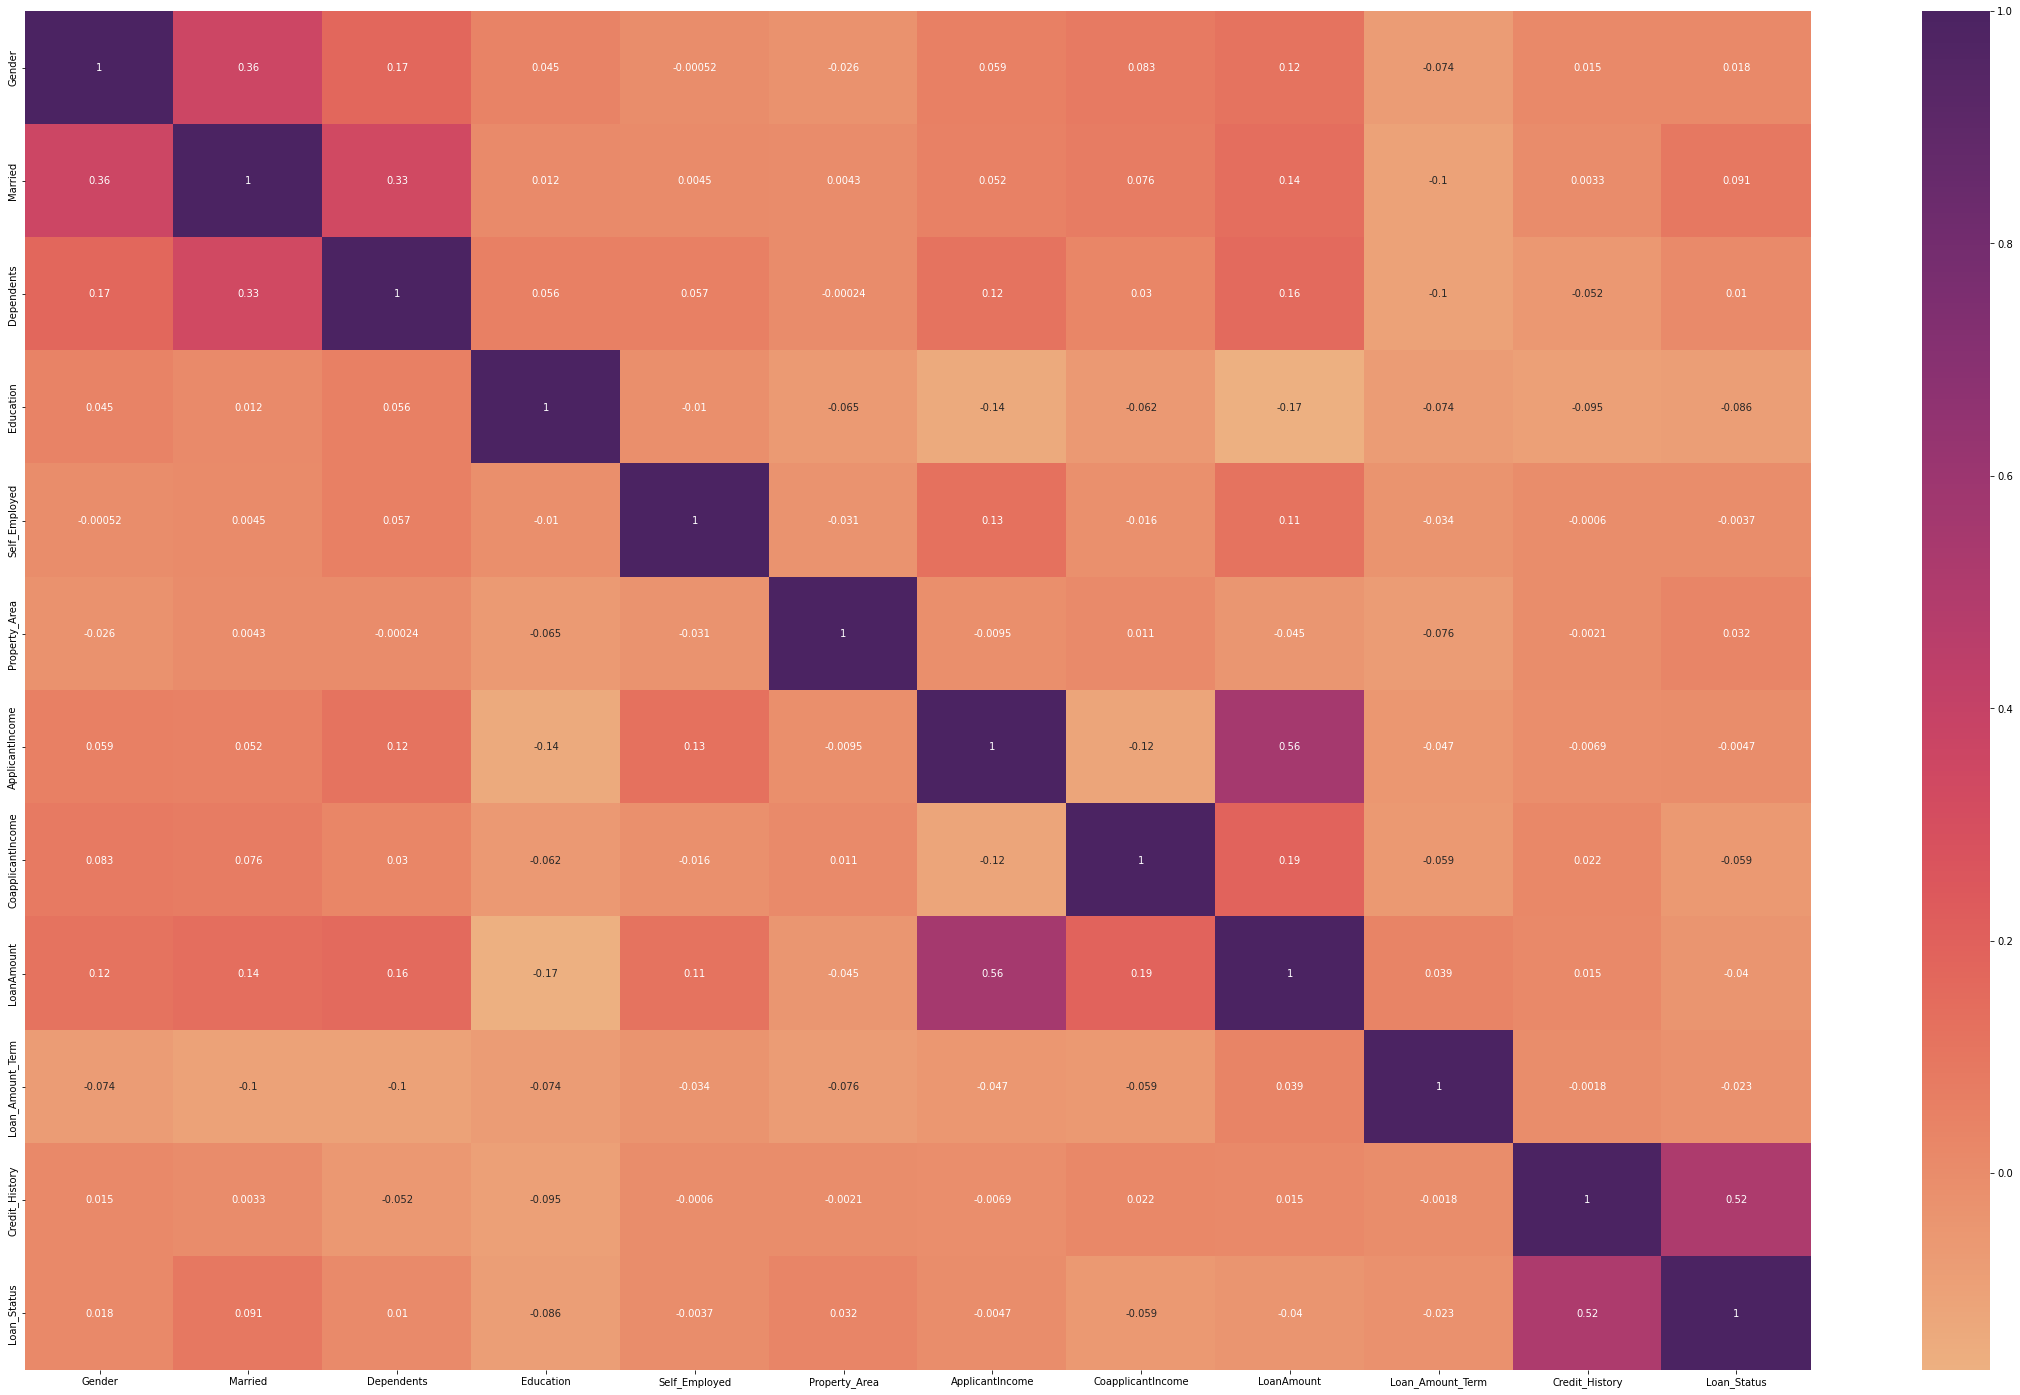

In [ ]:
plt.figure(figsize=(40,25))
sns.heatmap(df.corr(),annot= True,cmap = 'flare')
plt.show()

In [ ]:
# Create correlation matrix
corr_matrix = df.corr().abs()
corr_matrix

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,0.000525,0.025752,0.058809,0.082912,0.116791,0.074030,0.015104,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.004257,0.051708,0.075948,0.140653,0.100912,0.003285,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.000244,0.118202,0.030430,0.156092,0.103864,0.052246,0.010118
Education,0.045364,0.012304,0.055752,1.000000,0.010383,0.065243,0.140760,0.062290,0.169242,0.073928,0.095467,0.085884
Self_Employed,0.000525,0.004489,0.056798,0.010383,1.000000,0.030860,0.127180,0.016100,0.114256,0.033739,0.000599,0.003700
Property_Area,0.025752,0.004257,0.000244,0.065243,0.030860,1.000000,0.009500,0.010522,0.045023,0.076120,0.002080,0.032112
ApplicantIncome,0.058809,0.051708,0.118202,0.140760,0.127180,0.009500,1.000000,0.116605,0.555732,0.046531,0.006915,0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,0.062290,0.016100,0.010522,0.116605,1.000000,0.190020,0.059383,0.021598,0.059187
LoanAmount,0.116791,0.140653,0.156092,0.169242,0.114256,0.045023,0.555732,0.190020,1.000000,0.038747,0.015444,0.039871
Loan_Amount_Term,0.074030,0.100912,0.103864,0.073928,0.033739,0.076120,0.046531,0.059383,0.038747,1.000000,0.001817,0.022549


##Split base de donnee test and train

In [ ]:
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train,test in sss.split(x,y):
  X_train,X_test=x.iloc[train],x.iloc[test]
  y_train,y_test=y.iloc[train],y.iloc[test]
X_train.shape

(491, 11)

In [ ]:
#On va appliquer trois algorithmes logisitic Regression,KNN,DecisionTree
models={'LogisticRegression':LogisticRegression(random_state=42),
         'KNeighborsClassifier':KNeighborsClassifier(),
         'DecisionTreeClassifier':DecisionTreeClassifier(max_depth=1,random_state=42)
}
#la fonction de précision
def accu(y_true,y_pred,retu=False):
  acc=accuracy_score(y_true,y_pred)
  if retu:
    return acc
  else:
    print(f'la precision du model est {acc}')


#c'est la fonction d'application des modeles
def train_test_eval(models,X_train,y_train,X_test,y_test):
  for name,model in models.items():
    print(name,':')
    model.fit(X_train,y_train)
    accu(y_test,model.predict(X_test))
    print('_'*30)


In [ ]:
train_test_eval(models,X_train,y_train,X_test,y_test)

LogisticRegression :
la precision du model est 0.8536585365853658
______________________________
KNeighborsClassifier :
la precision du model est 0.6504065040650406
______________________________
DecisionTreeClassifier :
la precision du model est 0.8455284552845529
______________________________


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,0,0,0,2,5849.0,0.0,128.0,360.0,1.0,1
1,1,1,1,0,0,0,4583.0,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,2,3000.0,0.0,66.0,360.0,1.0,1
3,1,1,0,1,0,2,2583.0,2358.0,120.0,360.0,1.0,1
4,1,0,0,0,0,2,6000.0,0.0,141.0,360.0,1.0,1


In [ ]:
X_2=x[["Credit_History","Gender","Married","CoapplicantIncome"]]

In [ ]:
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train,test in sss.split(X_2,y):
  X_train,X_test=X_2.iloc[train],X_2.iloc[test]
  y_train,y_test=y.iloc[train],y.iloc[test]
X_train.shape

(491, 4)

In [ ]:
train_test_eval(models,X_train,y_train,X_test,y_test)

LogisticRegression :
la precision du model est 0.8536585365853658
______________________________
KNeighborsClassifier :
la precision du model est 0.6991869918699187
______________________________
DecisionTreeClassifier :
la precision du model est 0.8455284552845529
______________________________


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Appliquer la regression logistique sur notre base de donnee
Classifier=LogisticRegression()
Classifier.fit(X_2,y)

LogisticRegression()

In [ ]:
#Enregistrer le model
pickle.dump(Classifier,open('Credit_Model.pkl','wb'))